### Notebook Summary:
- **Data Loading**: AAPL stock data for 2023 was loaded using the `yfinance` library into a pandas DataFrame.
- **Basic Data Inspection**: The DataFrame's structure, dimensions, column names, data types, and statistical summaries were examined using `head()`, `shape`, `columns`, `info()`, and `describe()`.
- **Data Visualization**: A variety of plots were generated using `matplotlib` and `seaborn` to understand the data:
    - A line plot to visualize the trend of the 'Close' price over time.
    - Scatter plots to show relationships between 'Open' vs. 'Close' prices and 'Volume' vs. 'Close' prices.
    - A histogram and a box plot of the 'Close' price to analyze its distribution.
- **Machine Learning Model Training and Evaluation**:
    - The data was split into training and testing sets.
    - Two regression models, Linear Regression and Random Forest Regressor, were trained to predict the 'Close' price.
    - Both models were evaluated using R2 Score, Mean Absolute Error (MAE), and Mean Squared Error (MSE).
    - Visualizations were created to compare the actual 'Close' prices with the predicted prices from both models.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import yfinance as yf


df = yf.download('AAPL', start='2023-01-01', end='2024-01-01')

df.head()


/tmp/ipython-input-2826585734.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2023-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.211189,128.954537,122.324564,128.343757,112117500
2023-01-04,124.482033,126.747853,123.221057,125.004155,89113600
2023-01-05,123.161957,125.871086,122.905826,125.240599,80962700
2023-01-06,127.693596,128.353637,123.033897,124.137254,87754700
2023-01-09,128.215714,131.427273,127.959583,128.530965,70790800


In [ ]:
df.shape

(250, 5)

In [ ]:
df.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   250 non-null    float64
 1   (High, AAPL)    250 non-null    float64
 2   (Low, AAPL)     250 non-null    float64
 3   (Open, AAPL)    250 non-null    float64
 4   (Volume, AAPL)  250 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


In [ ]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,170.510816,171.803592,168.962666,170.222272,5.922355e+07
std,17.340362,17.272209,17.538700,17.536309,1.778332e+07
min,123.161957,125.871086,122.324564,124.137254,2.404830e+07
25%,159.947010,160.218352,158.553390,159.396985,4.781208e+07
50%,173.604637,175.138081,171.987039,173.377060,5.511085e+07
75%,185.426701,186.059910,182.954162,184.564625,6.574292e+07
max,196.256577,197.752444,195.156944,196.167422,1.543573e+08


In [ ]:
df[('Close', 'AAPL')]

,Close
,AAPL
Date,
2023-01-03,123.211189
2023-01-04,124.482033
2023-01-05,123.161957
2023-01-06,127.693596
2023-01-09,128.215714
...,...
2023-12-22,191.788773
2023-12-26,191.243912


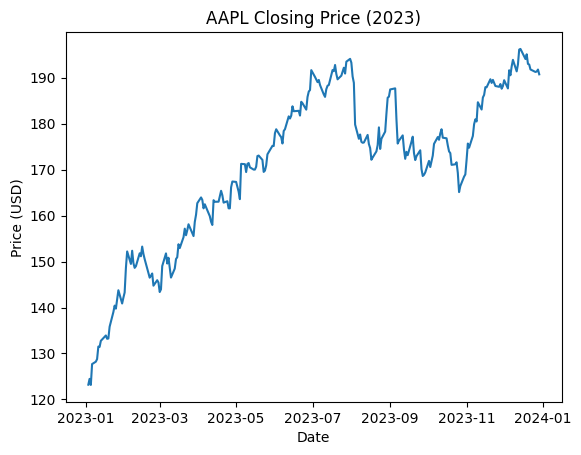

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df[('Close', 'AAPL')])
plt.title("AAPL Closing Price (2023)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()


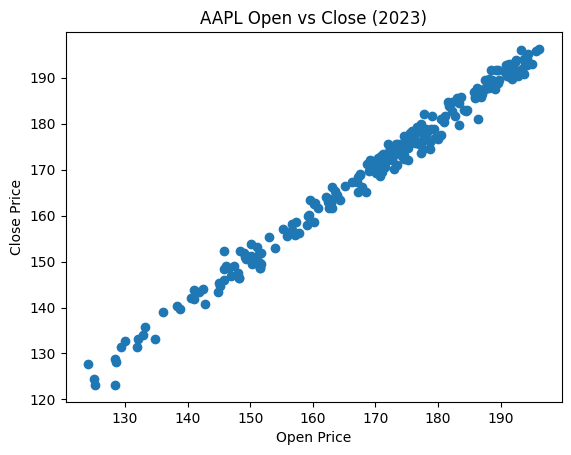

In [ ]:
plt.scatter(df[('Open', 'AAPL')], df[('Close', 'AAPL')])
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.title("AAPL Open vs Close (2023)")
plt.show()


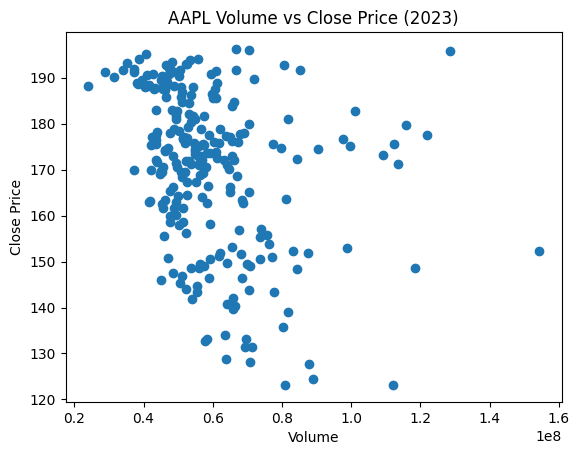

In [ ]:
plt.scatter(df[('Volume', 'AAPL')], df[('Close', 'AAPL')])
plt.xlabel("Volume")
plt.ylabel("Close Price")
plt.title("AAPL Volume vs Close Price (2023)")
plt.show()


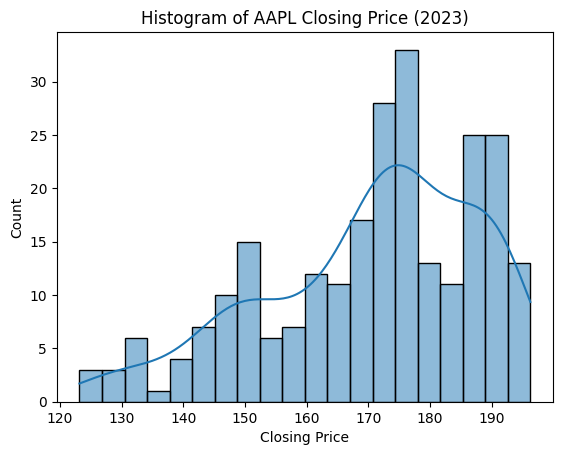

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df[('Close', 'AAPL')], bins=20, kde=True)

plt.title("Histogram of AAPL Closing Price (2023)")
plt.xlabel("Closing Price")
plt.ylabel("Count")
plt.show()


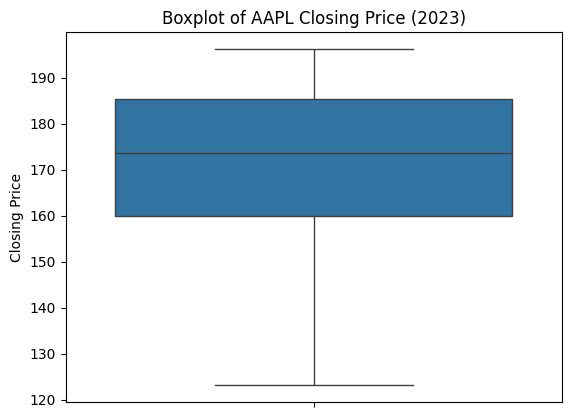

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=df[('Close', 'AAPL')])

plt.title("Boxplot of AAPL Closing Price (2023)")
plt.ylabel("Closing Price")
plt.show()


In [ ]:
import pandas as pd


X = df[[('Open','AAPL'), ('High','AAPL'), ('Low','AAPL'), ('Volume','AAPL')]]
y = df[('Close','AAPL')]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def evaluate(name, y_true, y_pred):
    print(f"{name}")
    print("R2 Score:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("-" * 30)

evaluate("Linear Regression", y_test, y_pred_lr)
evaluate("Random Forest Regressor", y_test, y_pred_rf)


Linear Regression
R2 Score: 0.9980260320893481
MAE: 0.6714092937175837
MSE: 0.6340974138107371
------------------------------
Random Forest Regressor
R2 Score: 0.9956735924903429
MAE: 0.9846203918457025
MSE: 1.389771230910735
------------------------------


In [ ]:
y_test.size

50

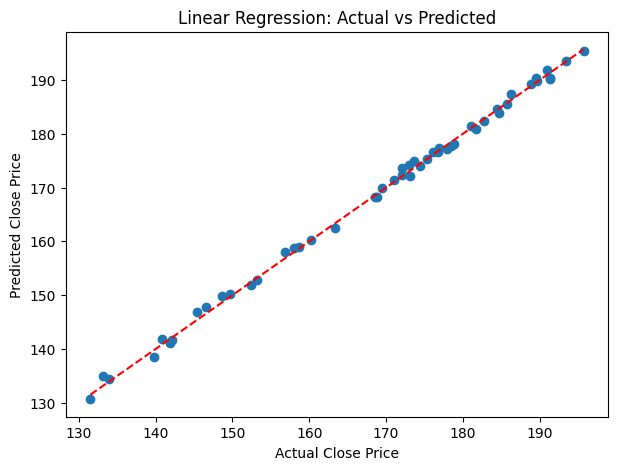

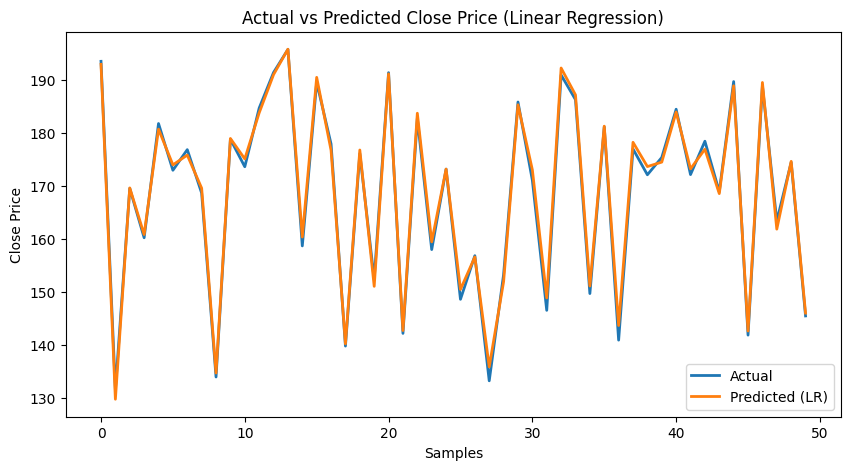

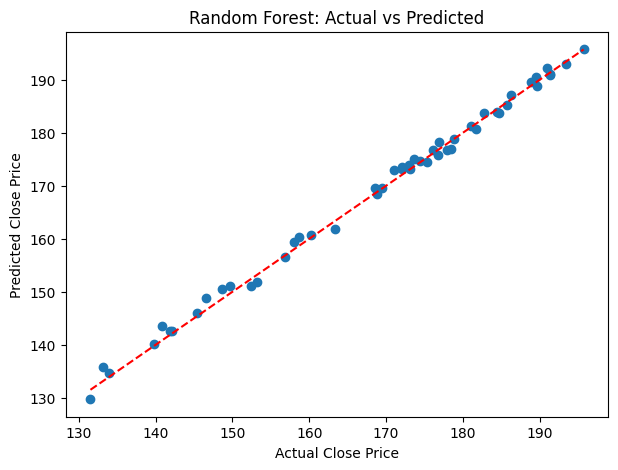

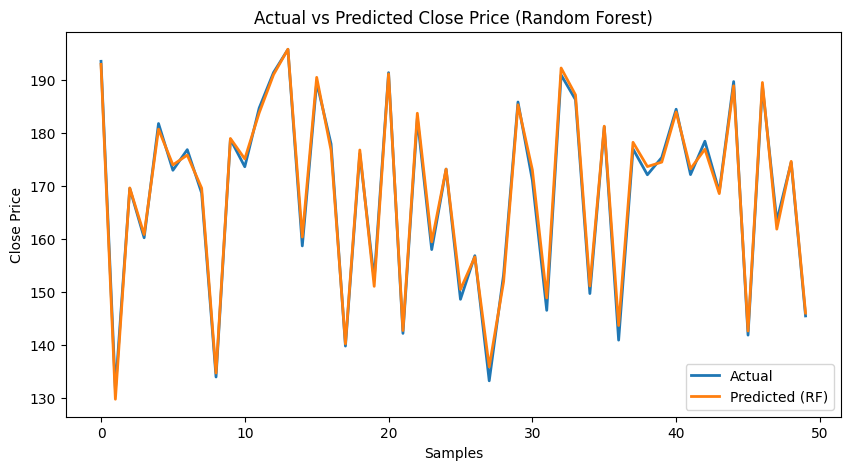

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual", linewidth=2)
plt.plot(y_pred_rf, label="Predicted (LR)", linewidth=2)
plt.title("Actual vs Predicted Close Price (Linear Regression)")
plt.xlabel("Samples")
plt.ylabel("Close Price")
plt.legend()
plt.show()


plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.plot()
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Random Forest: Actual vs Predicted")
plt.show()

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual", linewidth=2)
plt.plot(y_pred_rf, label="Predicted (RF)", linewidth=2)
plt.title("Actual vs Predicted Close Price (Random Forest)")
plt.xlabel("Samples")
plt.ylabel("Close Price")
plt.legend()
plt.show()
